Linear Regressions
=========

## Concept and Theory

Regression analysis explores the relationship between a quantitative response variable and one or more explanatory variables. If there is only one explanatory variable, it is called **Simple Linear Regression**. If there are more explanatory variables, it is called **Multiple Linear Regression**.<p>
Linear Regression is a statistical method that enables us to summarize and study the relationship between two variables: <br>
* **Dependent variable**: This is the variable whose value we want to explain or forecast. Its values depend on something else. We will denote the dependent variable as $y$.
* **Independent variable**: This is the variable that explains the other one. Its values are independent. It will be denote as $x$.

Linear Regression can be used to make predictions given two or more related variables. Suppose we have two variables that are related according to the relation: 
$$\begin{align*} y = \beta_0 + \beta_1 x &&\text{[1]} \end{align*}$$
<p>Given a set of ($x$,$y$) points, we could represent this set by a simple line connecting all those points given the relation in equation [1]. But if the set of points does not fit exactly a line? Well, at least we can find the best line that fits this model by using **Simple Linear Regression** to find it.

In this notebook I will demonstrate how we can find the line that best fits a two-variable model. Here will denote the dependent variable as **$y$** and the independent variable as $x$. Our goal is to find $\beta_0$ and $\beta_1$.

Suppose we have a set of data representing the height (meters) and weight (kg) of a certain population given by the points below:

In [7]:
height = [1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83]
weight = [52.21, 53.12, 54.48, 55.84, 57.20, 58.57, 59.93, 61.29, 63.11, 64.47, 66.28, 68.10, 69.92, 72.19, 74.46]

Let's plot these points:

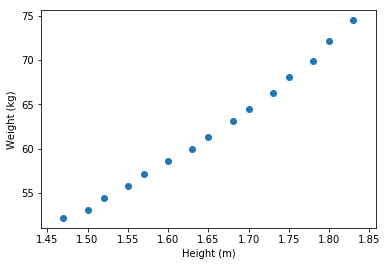

In [8]:
import matplotlib.pyplot as plt

plt.scatter(height, weight)
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()

We can see that there is a **positive correlation** between the height and weight of these population and we could approximate our set as a straight line. This line could be used to predict the weight of someone among this population who is not in our data, let's say someone who is 1.90m tall.<p>
This is a linear regression problem, once we are trying to find **which line best fits these points.** <p>
We will explore this problem using two different approaches: **Least Squares Error minimization** and a single **neuron**.

## Least Squares Error minimization

In the begining of the 18th century, the French mathematician Adrian-Marie Legendre and the German mathematician Johan Carl Friedrich Gauss claimed to be the first one to solve the problem of fitting linear equations to data. Regardless who won this dispute, this given solution was known as **Least Squares**. In this section we will demonstrate this approach with a very simple example that can be extended to our height vs. weight problem.<p>
Given the set of $N=7$ points in the image below, the best line that fits these points is the blue line.<p>
![](figures/linear-regression_1.png)
We can see that the green lines **vertically** connect each point to the blue line and they represent the distance between each point $i$ to our target blue line. Thus, we could model our total error $E$ as the sum of the squared distances $e_i$, which is given by:  

$$\begin{align*} 
    E = \sum_{i=1}^N (e_i)^2 = \sum_{i=1}^N (y_i-f(x_i, \beta))^2 &&\text{[2]} 
\end{align*}$$


Our model function $f(x_i,\beta)$ represents the function of the line that best fits our model.  $\beta$ is a vector containing the parameters ($\beta_0$ and $\beta_1$) that are adjustable to give different lines. In other words, we can say that:

$$\begin{align*} 
    f(x,\beta) = \beta_0+\beta_1 x  &&\text{[3]} 
\end{align*}$$

Our goal is to find the parameters $\beta_0$ and $\beta_1$ that describe our line. Thus, we want to minimize the error $E$ that is obtained gathering the equations [2] and [3] resulting:

$$\begin{align*}
\min_{\beta_0,\beta_1} E = \min_{\beta_0, \beta_1} \sum_{i=1}^N (y_i - \beta_0 - \beta_1 x_i)^2  &&\text{[4]} 
\end{align*}$$

In order to minimize our error, we will derive the equation above with respect to $\beta_0$ and $\beta_1$ and set them equal to 0. This give us:

$$\begin{align*} 
\frac{\partial E}{\partial \beta_0} = \sum_{i=1}^N -2(y_i - \beta_0 - \beta_1 x_i) = 0  &&\text{[5]} 
\end{align*}$$

and

$$\begin{align*} 
\frac{\partial E}{\partial \beta_1} = \sum_{i=1}^N -2x_i(y_i - \beta_0 - \beta_1 x_i) = 0  &&\text{[6]} 
\end{align*}$$


Let's solve equations [5] and [6] with the **First Order Conditions** for $\beta_0$ and $\beta_1$.<p> 
Starting with $\beta_0$ from equation [5]:

\begin{eqnarray*}
&\sum_{i=1}^N -2(y_i - \beta_0 - \beta_1 x_i) = 0 \nonumber\\
&\sum_{i=1}^N (y_i - \beta_0 - \beta_1 x_i) = 0 \nonumber\\
&\sum_{i=1}^N y_i - \sum_{i=1}^N \beta_0 - \sum_{i=1}^N \beta_1 x_i = 0 \nonumber\\
&\sum_{i=1}^N y_i - N\beta_0 - \beta_1\sum_{i=1}^N x_i = 0\nonumber\\
&\beta_0 = \frac{1}{N}\sum_{i=1}^N y_i - \frac{\beta_1}{N}\sum_{i=1}^N x_i\nonumber\\
&\boxed{\beta_0 = \bar{y} - \beta_1\bar{x}}  &&\text{[7]} \nonumber
\end{eqnarray*}

Where $\bar{y}$ and $\bar{x}$ are the means of $y$ and $x$ values respectively.<p> 
Now, let's solve for $\beta_1$ from equation [6]:

\begin{eqnarray*}
&\sum_{i=1}^N -2x_i(y_i - \beta_0 - \beta_1 x_i) = 0\nonumber\\
&\sum_{i=1}^N x_i(y_i - \beta_0 - \beta_1 x_i) = 0\nonumber\\
&\sum_{i=1}^N x_iy_i - \sum_{i=1}^N x_i\beta_0 - \sum_{i=1}^N \beta_1 x_i^2 = 0\nonumber\\
&\sum_{i=1}^N x_iy_i - \beta_0\sum_{i=1}^N x_i - \beta_1\sum_{i=1}^N x_i^2 = 0\nonumber\\
\end{eqnarray*}

Substituting in the equation above the definition of $\beta_0$ from equation [7] we have:

\begin{eqnarray*}
&\sum_{i=1}^N x_iy_i - \left(\frac{1}{N}\sum_{i=1}^N y_i - \frac{\beta_1}{N}\sum_{i=1}^N x_i\right)\sum_{i=1}^N x_i - \beta_1\sum_{i=1}^N x_i^2 = 0\nonumber\\
&\sum_{i=1}^N x_iy_i - \frac{1}{N}\sum_{i=1}^N x_i \sum_{i=1}^N y_i = \beta_1 \left(-\frac{1}{N}\sum_{i=1}^N x_i \sum_{i=1}^N x_i + \sum_{i=1}^N x_i^2 \right)\nonumber\\
&\beta_1 = \frac{\sum_{i=1}^N x_iy_i - \frac{1}{N}\sum_{i=1}^N x_i \sum_{i=1}^N y_i}{\frac{1}{N} \sum_{i=1}^N x_i \sum_{i=1}^N x_i + \sum_{i=1}^N x_i^2}\nonumber\\
&\beta_1 = \frac{N \sum_{i=1}^N x_iy_i - \sum_{i=1}^N x_i \sum_{i=1}^N y_i}{-\left(\sum_{i=1}^N x_i\right)^2 + N \sum_{i=1}^N x_i^2}\nonumber\\
&\boxed{\beta_1 = \frac{\sum_{i=1}^N \left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right)}{\sum_{i=1}^N \left(x_i - \bar{x}\right)^2}}  &&\text{[8]}\nonumber\\
\end{eqnarray*}

Where $\bar{y}$ and $\bar{x}$ are the means of $y$ and $x$ values respectively.

Therefore, the line that best fits our model is given by:

$$\begin{align*} 
\boxed{y = \beta_0 + \beta_1 x \text{ , where }
            \left\{
                \begin{array}{ll}
                  \beta_0 = \bar{y} - \beta_1\bar{x}\\
                  \beta_1 = \frac{\sum_{i=1}^N \left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right)}{\sum_{i=1}^N \left(x_i - \bar{x}\right)^2}
                \end{array}\right.} &&\text{[9]} 
\end{align*} $$

### Generalizing

So far we have been working with $N$ samples and trying to find the best fitting line. Our line had 2 coefficients or **degrees of freedom** ($\beta_0$ and $\beta_1$) that were the descriptors of our line. Alternatively, we could generalize this problem to have $p$ degrees of freedom ($\beta_0$, $\beta_1$, ..., $\beta_{p-1}$) and make our line more complicated raising $x$ to different powers. For example:<br>
* **Line** (1st degree equation): $\beta_0 + \beta_1x$ with 2 degrees of freedom ($p$=2)
* **Quadratic function** (2nd degree equation): $\beta_0 + \beta_1x + \beta_2x^2$ with 3 degrees of freedom ($p$=3)
* **Cubic function** (3rd degree equation): $\beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3$ with 4 degrees of freedom ($p$=4)
* **Quartic function** (4th degree equation): $\beta_0 + \beta_1x + \beta_2x^2 + \beta_3x^3 + \beta_4x^4$ with 5 degrees of freedom ($p$=5)<br>

**Attention:** if we start raising $x$ to different powers, we will be going beyond Linear Regression (because now instead of a line, our fitting model will  be a polynomial of higher degree). In order to keep with Linear Regression, we will increase the degrees of freedom of our linear model by adding $\beta$'s to our line considering our data has now more independent variables ($x$'s).<p>

The equation below is just an expansion of the previous particular linear case where we had only two degrees of freedom. Now we will have $p+1$ degrees of freedom in a **system of $N$ linear equations** taken over _i_ from 1 to $N$ (one for each sample). The number of independent variables of our samples is also given by $p$.

$$\begin{align*} 
    y_i = \beta_0 + \sum_{j=1}^p \beta_{j}x_{j}   &&\text{[10]} 
\end{align*}$$

We need to solve this linear equations system to obtain the best line (or a hyperplane if we have more dimensions) to fit our model, but suppose our linear model is an **overdetermined system**. Let's say we have more linearly independent equations than unknowns (betas). This kind of system has no solution, so what would be the best line to fit our model?

To answer this question, we will do exactly the same approach as before: We have to minimize our total error $E$, that now is the sum of the error of all $N$ samples: 

$$\begin{align*} 
    E = \sum_{i=1}^N (y_i - \beta_0 - \sum_{j=1}^p \beta_{j} x_j)^2  &&\text{[11]} 
\end{align*}$$

The equation above is also known as Residual Sum of Squared Errors (RSS or RSSE).

Before we minimize our error $E$ from equation [11], let's simplify it using matrix notation. We can also remove $\beta_0$ by appending a column vector of 1 values to our $X$ matrix ($X_{i,1}=1$) and increasing the length of $\beta$ by one. Thus:

\begin{eqnarray*}
&E = \bigl\| Y - X\beta \bigr\|^2 \nonumber\\
&E = Y^{T}Y - 2\beta^{T}X^{T}Y + \beta^{T}X^{T}X\beta &&\text{[12]} \nonumber\\
\end{eqnarray*}

Where:

$$Y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix},
X = \begin{bmatrix}
1 & X_{1,2} & X_{1,3} & \cdots & X_{1,p+1} \\ 
1 & X_{2,2} & X_{2,3} & \cdots & X_{2,p+1} \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
1 & X_{N,2} & X_{N,3} & \cdots & X_{N,p+1}
\end{bmatrix}, 
B = \begin{bmatrix} \beta_0 \\ \beta_2 \\ \vdots \\ \beta_{p+1} \end{bmatrix}$$

Remeber that $N$ is our number of samples and $p$ is our independent variables.

Now let's derive our error equation [12] with respect to our matrix $\beta$, set it equal to 0 and divide by 2 (as we did before by using First Order Conditions).

\begin{eqnarray*} 
&\frac{\partial E}{\partial \beta} = \frac{\partial \left(Y^{T}Y - 2\beta^{T}X^{T}Y + \beta^{T}X^{T}X\beta\right)}{\partial \beta} = 0 \nonumber\\
&X^{T}Y+X^{T}X\beta = 0\nonumber\\
&\boxed{\beta = (X^{T}X)^{-1}X^{T}Y} &&\text{[13]} \nonumber\\
\end{eqnarray*}

Note that if $(X^{T}X)^{-1}X^{T}$ is the pseudo-inverse of $X$. But if $(X^{T}X)^{-1}X^{T}$ is not invertible (singular), iterative solvers methods can be used to overcome this problem. However we still could use the pseudo-inverse of $X$ to have our solution, but it would not be the unique fitting line (or plane) for our solution.

In the end of this notebook, we will solve the initial problem (height vs. weight) using our obtained equations with different degrees of freedom to see the behavior of the fitting line. :)

**Observation:** We could have applied Linear Algebra using the concept of projections to get the same result. But I think it would be too much information on this notebook. We would end up obtaining the same result though. If I am not mistaken, I am pretty sure I have seen this proof in some Linear Algebra open courses. It might have been in a course by professor Strang (MIT) or Stephen Boyd (Stanford). This is a trivial proof, but in case you don't find those classes please send me an email and I will post it here. :)

## Representing linear equation with a neuron

The following image shows an example where we could use a single neuron to represent a linear equation.<p>
![](figures/linear_regression_neuron.png)
Note that we have:
* 1 input $x_0$
* 2 parameters to be adjusted $\beta_0$ and $\beta_1$
* 1 output $y$

We can see that our output $y$ is given exactly like our linear model seen before: $y=\beta_0+\beta_1x$

Let's now model equation [10] but with only one entry (sample) $N=1$: 
$$ y = \beta_0 + \sum_{j=1}^p \beta_{j}x_{j}$$

Our equation is a linear combination of its $p$+1 entries with the $\beta$'s and can be represented with the single neuron as shown in the image below:

![](figures/linear_regression_neuron_2.png)

That's why we combine neurons in layers in order to obtain more degrees of freedom as we saw previously with **Least Squares Error minimization**.<p>
**Observation:** As we are dealing with Linear Regression, in these examples we are considering that our neuron has a linear activation function.